# Importing Data

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import os
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

print(os.getcwd())
os.chdir('/Users/ryanegbert/Desktop/sum_mod2/python/final_project')
data = pd.read_csv("data/original_life_expectancy_data.csv")
bmi = pd.read_csv("data/BMI.csv")
measles = pd.read_csv("data/measles_immunization.csv")
countries = pd.read_csv("data/CountryNames.csv")
gdp = pd.read_csv("data/GDP.csv", header=4)
population = pd.read_csv("data/Population Data Set.csv", header=4)
# coordinates = pd.read_csv("data/lat_long_values.csv")#

/Users/ryanegbert/Desktop/sum_mod2/python/final_project


# Merging Original Dataset with New Datasets

## BMI

In [62]:
bmi = pd.DataFrame(bmi)

In [63]:
data['New BMI'] = 0
bmi = bmi[bmi['FactValueNumeric'].isna() != True]
bmi['FactValueNumeric'].isna().value_counts(normalize=True)

False    1.0
Name: FactValueNumeric, dtype: float64

In [64]:
for index, row in data.iterrows():
    try:
        mask = ((bmi['Location'] == row['Country']) & (bmi['Period'] == row['Year']) & (bmi['Dim1'] == 'Both sexes'))
        x = bmi[mask]['FactValueNumeric']
        #print(x, type(x))
        data.loc[index, 'New BMI'] = float(x)
        #data.iloc[index, 'New BMI'] = float(BMI[((BMI['Location'] == row['Country']) & (BMI['Period'] == row['Year']) & (BMI['Dim1'] == 'Both sexes'))]['FactValueNumeric'].values[0])
        if len(x)==0:
            continue
    except:
        continue        


## GDP

In [65]:
i = 0
for index, row in gdp.iterrows():
    try:
        mask = row['Country Name'] == countries['Country']    
        x = countries[mask]['Target Name'].values[0]
        gdp.at[index, 'Country Name'] = x
    
    except:    
        continue

In [66]:
for index, row in data.iterrows():
    try:
        mask = gdp['Country Name'] == row['Country']     
        x = gdp[mask][str(row['Year'])].values[0]
        data.at[index, 'New GDP'] = x
    
    except:
    
        continue


data['New GDP'].isna().value_counts(normalize=True)

False    0.956093
True     0.043907
Name: New GDP, dtype: float64

## Measles

In [67]:
for index, row in data.iterrows():
    try:
        mask = measles['Country Name'] == row['Country']     
        x = measles[mask][str(row['Year'])].values[0]
        data.at[index, 'New Measles'] = x
    
    except:
    
        continue
        
data['Immunization Score'] = round((data['Hepatitis B'] + data['Polio'] + data['Diphtheria '] + data['New Measles']) / 4, 2)

## Population

In [68]:
i = 0
for index, row in population.iterrows():
    try:
        mask = row['Country Name'] == countries['Country']    
        x = countries[mask]['Target Name'].values[0]
        population.at[index, 'Country Name'] = x
    
    except:    
        continue

In [69]:
for index, row in data.iterrows():
    try:
        mask = population['Country Name'] == row['Country']     
        x = population[mask][str(row['Year'])].values[0]
        data.at[index, 'New Population'] = x
    
    except:
    
        continue
data['New Population'].isna().value_counts(normalize=True)

False    0.98162
True     0.01838
Name: New Population, dtype: float64

In [70]:
print(data['New Population'].isna().value_counts(normalize=True))
print(data['Population'].isna().value_counts(normalize=True))

False    0.98162
True     0.01838
Name: New Population, dtype: float64
False    0.77808
True     0.22192
Name: Population, dtype: float64


# Removed Null Values for Life Expectancy

In [71]:
data.dropna(subset = ['Life expectancy '], inplace = True)

In [72]:
data.shape

(2928, 27)

In [73]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'New BMI', 'New GDP',
       'New Measles', 'Immunization Score', 'New Population'],
      dtype='object')

In [74]:
data = data[['Country', 'Year', 'Status', 'Life expectancy ',
        'infant deaths', 'Alcohol', 'percentage expenditure', 
        'Hepatitis B', 'under-five deaths ', 'Polio', 
        'Total expenditure', 'Diphtheria ', ' HIV/AIDS',
        ' thinness  1-19 years', ' thinness 5-9 years',
        'Income composition of resources', 'Schooling', 'New BMI', 'New GDP',
        'New Measles', 'Immunization Score', 'New Population']]

In [76]:
data.columns = [
    'Country', 
    'Year', 
    'Status', 
    'Life Expectancy', 
    'Infant Deaths', 
    'Alcohol', 
    'Percentage Expenditure',
    'Hepatitis B', 
    'Under-Five Deaths',
    'Polio',
    'Total Expenditure',
    'Diphtheria',
    'HIV/AIDS',
    'Thinness (1-19 yrs)',
    'Thinness (5-9 yrs)',
    'Income Composition of Resources',
    'Schooling',
    'BMI',
    'GDP',
    'Measles',
    'Immunization Score',
    'Population'
]

In [77]:
data.head()

,Country,Year,Status,Life Expectancy,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Under-Five Deaths,Polio,...,HIV/AIDS,Thinness (1-19 yrs),Thinness (5-9 yrs),Income Composition of Resources,Schooling,BMI,GDP,Measles,Immunization Score,Population
0,Afghanistan,2015,Developing,65.0,62,0.01,71.279624,65.0,83,6.0,...,0.1,17.2,17.3,0.479,10.1,23.3,574.184114,63.0,49.75,34413603.0
1,Afghanistan,2014,Developing,59.9,64,0.01,73.523582,62.0,86,58.0,...,0.1,17.5,17.5,0.476,10.0,23.2,583.656193,60.0,60.50,33370804.0
2,Afghanistan,2013,Developing,59.9,66,0.01,73.219243,64.0,89,62.0,...,0.1,17.7,17.7,0.470,9.9,23.0,587.565090,57.0,61.75,32269592.0
3,Afghanistan,2012,Developing,59.5,69,0.01,78.184215,67.0,93,67.0,...,0.1,17.9,18.0,0.463,9.8,22.9,576.190126,59.0,65.00,31161378.0
4,Afghanistan,2011,Developing,59.2,71,0.01,7.097109,68.0,97,68.0,...,0.1,18.2,18.2,0.454,9.5,22.8,528.736648,64.0,67.00,30117411.0


# General Trends

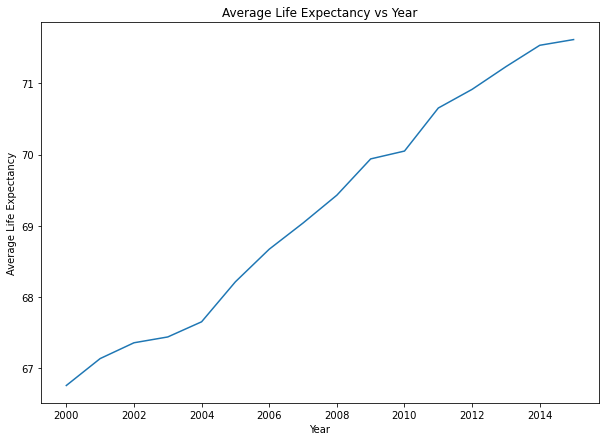

In [78]:
overall_average = data.groupby(['Year'])
overall_average = overall_average.aggregate({'Life Expectancy' : 'mean'})

plt.figure(figsize=(10,7))
plt.plot(overall_average.index, overall_average['Life Expectancy'])

plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy vs Year')
plt.savefig('Average Life Expectancy vs Year 1.jpg')
plt.show()

# Average Life Expectancy by Country

In [79]:
mask1 = data['Country'] == 'United States of America'
mask2 = data['Country'] == 'Saudi Arabia'
mask3 = data['Country'] == 'China'
mask4 = data['Country'] == 'India'
USA_average = data[mask1]
Saudi_average = data[mask2]
China_average = data[mask3]
India_average = data[mask4]

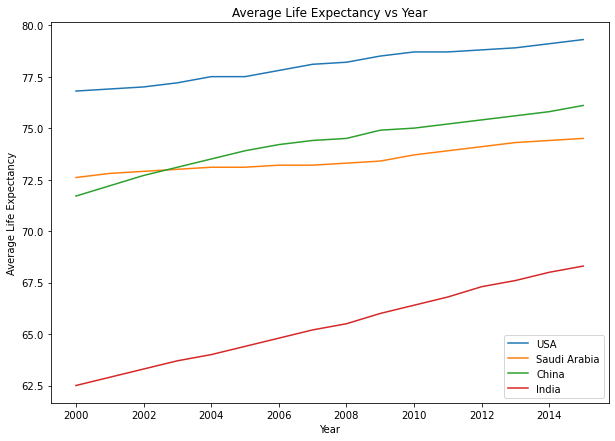

In [80]:
plt.figure(figsize=(10,7))
plt.plot(USA_average['Year'], USA_average['Life Expectancy'], label = "USA")
plt.plot(Saudi_average['Year'], Saudi_average['Life Expectancy'], label = "Saudi Arabia")
plt.plot(China_average['Year'], China_average['Life Expectancy'], label = "China")
plt.plot(India_average['Year'], India_average['Life Expectancy'], label = "India")
plt.legend()

plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy vs Year')
plt.savefig('Average Life Expectancy vs Year 2.jpg')

plt.show()

# World Map

In [81]:
country_average = data.groupby(['Country'])
country_average = country_average.aggregate({'Country' : 'min','Life Expectancy' : 'mean'}).sort_values("Life Expectancy")
country_average.dropna(how = 'any', inplace = True)

In [82]:
init_notebook_mode(connected = True)

df = country_average

layout = dict(title='World Average Life Expectancy', geo=dict(showframe=False, projection={'type': 'natural earth'}))

records = go.Choropleth(locations=df['Country'], locationmode = 'country names', z=df['Life Expectancy'], colorscale='blues', colorbar={'title': 'Life Expectancy'})

fig = go.Figure(data=records, layout=layout)
# fig.write_image("world_map.png")

iplot(fig)


# Top 5 and Bottom 5 Countries

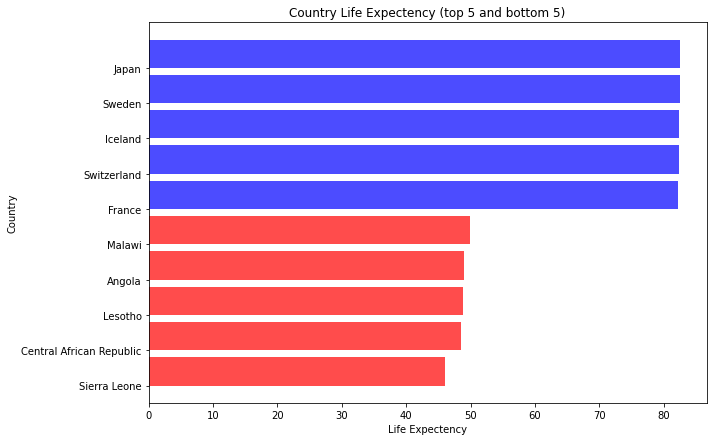

In [83]:
country_average = data.groupby(['Country'])
country_average = country_average.aggregate({'Life Expectancy' : 'mean'}).sort_values("Life Expectancy")
country_average_top = country_average.tail(5)
country_average_bottom = country_average.head(5)

plt.figure(figsize=(10,7))
plt.barh(country_average_bottom.index, country_average_bottom['Life Expectancy'], alpha=.7, align='edge', color = 'r')
plt.barh(country_average_top.index, country_average_top['Life Expectancy'], alpha=.7, align='edge', color = 'b')

plt.title('Country Life Expectency (top 5 and bottom 5)')
plt.xlabel('Life Expectency')
plt.ylabel('Country')
plt.savefig('CountrysAverage.jpg')
plt.show()

# Developed vs. Developing

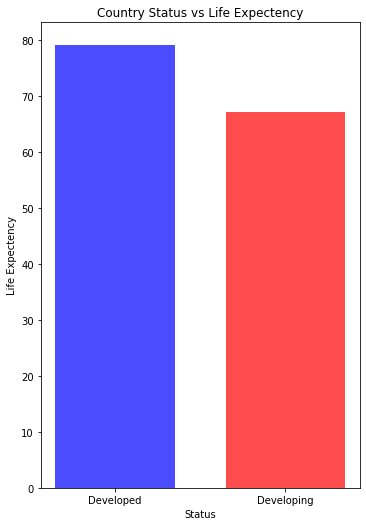

In [84]:
aggre_data = data.groupby('Status')['Life Expectancy'].sum()/data.groupby('Status')['Life Expectancy'].count()
aggre_data = pd.DataFrame(aggre_data)

bar_width = 0.7
opacity = 0.7
plt.figure(figsize=(5,7))

plt.bar(aggre_data.index, aggre_data['Life Expectancy'], bar_width,alpha=opacity, color = ['b', 'r'])
plt.tight_layout()
plt.title('Country Status vs Life Expectency')
plt.xlabel('Status')
plt.ylabel('Life Expectency')
plt.savefig('Country Status vs Life Expectency.jpg')
plt.show()

# Schooling

In [85]:
schooling = data[['Country', 'Year', 'Status', 'Life Expectancy', 'Schooling','Population']]

In [86]:
schooling.head()

,Country,Year,Status,Life Expectancy,Schooling,Population
0,Afghanistan,2015,Developing,65.0,10.1,34413603.0
1,Afghanistan,2014,Developing,59.9,10.0,33370804.0
2,Afghanistan,2013,Developing,59.9,9.9,32269592.0
3,Afghanistan,2012,Developing,59.5,9.8,31161378.0
4,Afghanistan,2011,Developing,59.2,9.5,30117411.0


In [87]:
schooling = schooling.dropna(subset=["Schooling"]).copy()

In [88]:
print(schooling['Schooling'].isna().value_counts(normalize=True))

False    1.0
Name: Schooling, dtype: float64


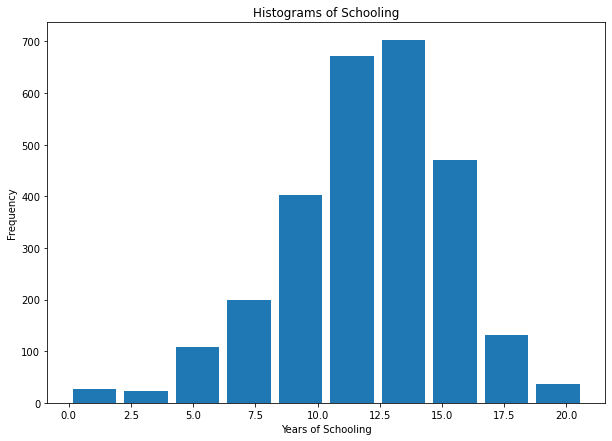

In [89]:
#reference: https://realpython.com/python-histograms/ 
plt.figure(figsize=(10,7))
plt.hist(x=schooling['Schooling'], rwidth=0.85)
plt.xlabel('Years of Schooling')
plt.ylabel('Frequency')
plt.title('Histograms of Schooling')
plt.savefig("schooling_hist_before.png")
plt.show()

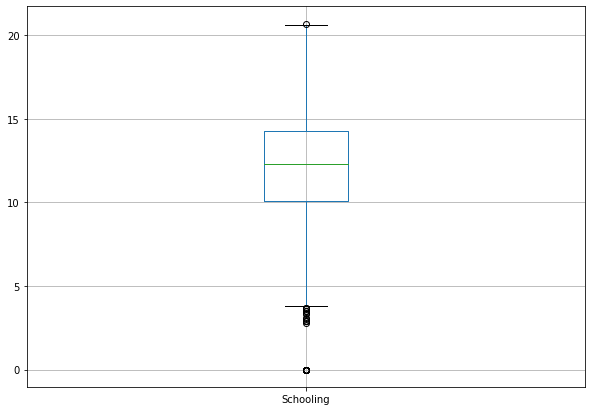

In [90]:
plt.figure(figsize=(10,7))
schooling.boxplot(column = ['Schooling'])
plt.savefig("schooling_box.png")

In [91]:
Q1 = schooling['Schooling'].quantile(q=0.25)
Q3 = schooling['Schooling'].quantile(q=0.75)
mask1 = (schooling['Schooling'] < Q3 + 1.5 * (Q3-Q1)) & (schooling['Schooling'] > Q1 - 1.5 * (Q3-Q1))
schooling = schooling[mask1]

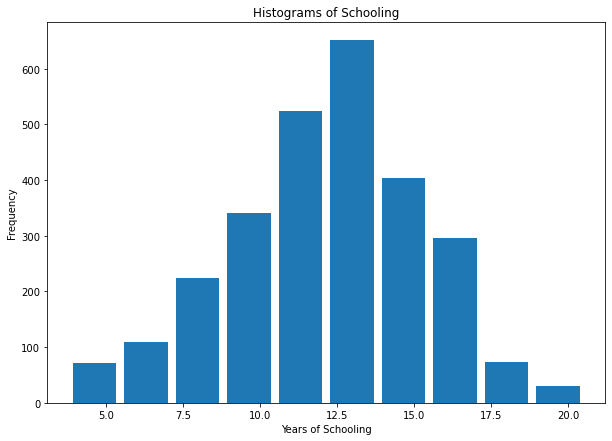

In [92]:
plt.figure(figsize=(10,7))
plt.hist(x=schooling['Schooling'], rwidth=0.85)
plt.xlabel('Years of Schooling')
plt.ylabel('Frequency')
plt.title('Histograms of Schooling')
plt.savefig("schooling_hist_after.png")
plt.show()

 
2.353 x + 40.88


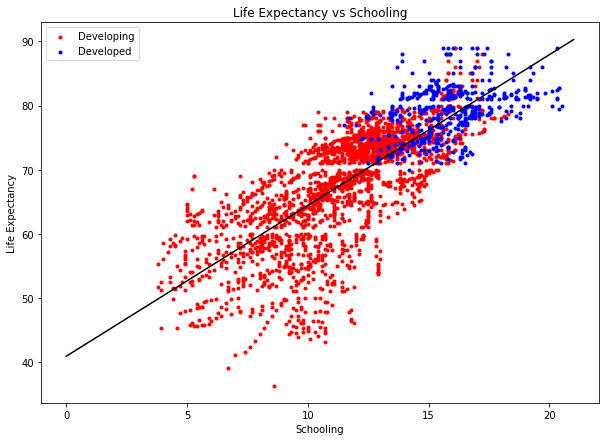

In [93]:
x1 = schooling['Schooling'][schooling['Status'] == 'Developing']
y1 = schooling['Life Expectancy'][schooling['Status'] == 'Developing']
x2 = schooling['Schooling'][schooling['Status'] == 'Developed']
y2 = schooling['Life Expectancy'][schooling['Status'] == 'Developed']
plt.figure(figsize=(10,7))
plt.scatter(x1, y1, marker=".", color='red')
plt.scatter(x2, y2, marker='.', color='blue')
plt.legend(['Developing', 'Developed'])

model = np.poly1d(np.polyfit(schooling['Schooling'], schooling['Life Expectancy'], 1))
polyline = np.linspace(0,21)
plt.plot(polyline, model(polyline), color = "black")
print(model)
plt.title('Life Expectancy vs Schooling')
plt.xlabel('Schooling')
plt.ylabel("Life Expectancy")
plt.savefig("schooling.png")
plt.show()

# Income Composition

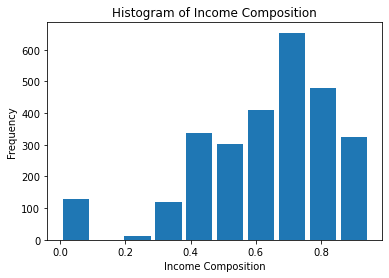

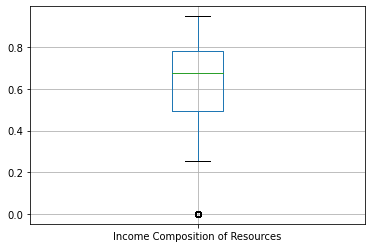

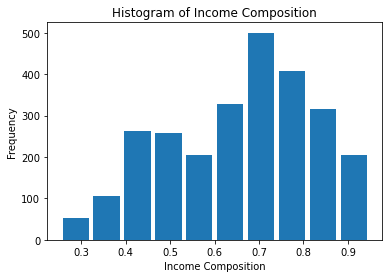

 
51.06 x + 35.97


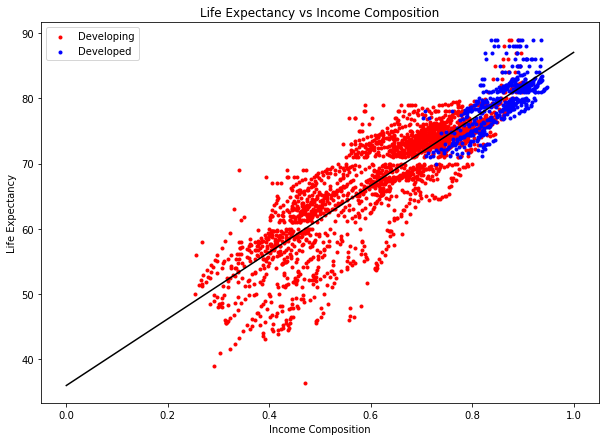

In [94]:
income_comp = data[['Country', 'Year', 'Status', 'Life Expectancy', 'Income Composition of Resources','Population']]
income_comp = income_comp.dropna(subset=["Income Composition of Resources"]).copy()

plt.hist(x=income_comp['Income Composition of Resources'], rwidth=0.85)
plt.xlabel('Income Composition')
plt.ylabel('Frequency')
plt.title('Histogram of Income Composition')
plt.show()

income_comp.boxplot(column = ['Income Composition of Resources'])
plt.show()

Q1 = income_comp['Income Composition of Resources'].quantile(q=0.25)
Q3 = income_comp['Income Composition of Resources'].quantile(q=0.75)
mask1 = (income_comp['Income Composition of Resources'] < Q3 + 1.5 * (Q3-Q1)) & (income_comp['Income Composition of Resources'] > Q1 - 1.5 * (Q3-Q1))
income_comp = income_comp[mask1]

plt.hist(x=income_comp['Income Composition of Resources'], rwidth=0.85)
plt.xlabel('Income Composition')
plt.ylabel('Frequency')
plt.title('Histogram of Income Composition')
plt.show()

x1 = income_comp['Income Composition of Resources'][income_comp['Status'] == 'Developing']
y1 = income_comp['Life Expectancy'][income_comp['Status'] == 'Developing']
x2 = income_comp['Income Composition of Resources'][income_comp['Status'] == 'Developed']
y2 = income_comp['Life Expectancy'][income_comp['Status'] == 'Developed']
plt.figure(figsize=(10,7))
plt.scatter(x1, y1, marker=".", color='red')
plt.scatter(x2, y2, marker='.', color='blue')
plt.legend(['Developing', 'Developed'])

model = np.poly1d(np.polyfit(income_comp['Income Composition of Resources'], income_comp['Life Expectancy'], 1))
polyline = np.linspace(0,1)
plt.plot(polyline, model(polyline), color = "black")
print(model)
plt.title('Life Expectancy vs Income Composition')
plt.xlabel('Income Composition')
plt.ylabel("Life Expectancy")
plt.savefig("income_comp.png")
plt.show()

# Population

           2
-5.53e-18 x + 8.226e-09 x + 69.05


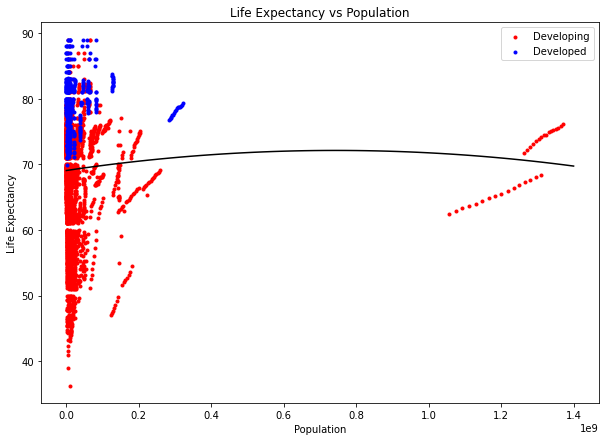

In [95]:
population = data[['Country', 'Year', 'Status', 'Life Expectancy', 'Population']]
population = population.dropna(subset=["Population"]).copy()

x1 = population['Population'][population['Status'] == 'Developing']
y1 = population['Life Expectancy'][population['Status'] == 'Developing']
x2 = population['Population'][population['Status'] == 'Developed']
y2 = population['Life Expectancy'][population['Status'] == 'Developed']
plt.figure(figsize=(10,7))
plt.scatter(x1, y1, marker=".", color='red')
plt.scatter(x2, y2, marker='.', color='blue')
plt.legend(['Developing', 'Developed'])

model = np.poly1d(np.polyfit(population['Population'], population['Life Expectancy'], 2))
polyline = np.linspace(0,1.4e9)
plt.plot(polyline, model(polyline), color = "black")
print(model)
plt.title('Life Expectancy vs Population')
plt.xlabel('Population')
plt.ylabel("Life Expectancy")
plt.savefig("population.png")
plt.show()

# Thinness

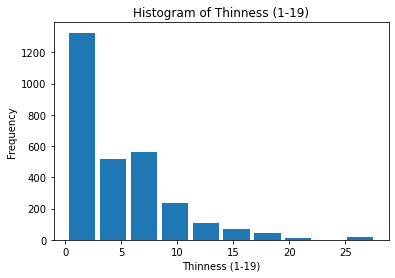

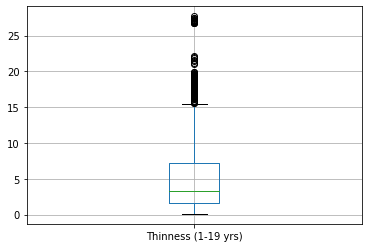

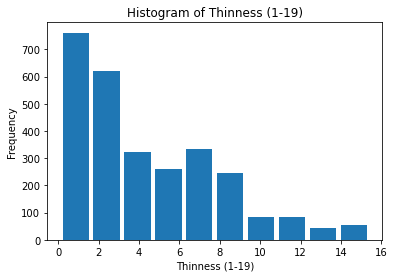

 
-1.498 x + 76.03


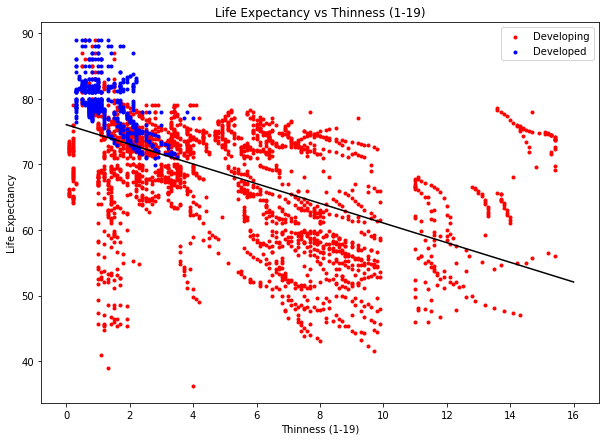

In [96]:
thinness = data[['Country', 'Year', 'Status', 'Life Expectancy', 'Thinness (1-19 yrs)','Population']]
thinness = thinness.dropna(subset=["Thinness (1-19 yrs)"]).copy()

plt.hist(x=thinness['Thinness (1-19 yrs)'], rwidth=0.85)
plt.xlabel('Thinness (1-19)')
plt.ylabel('Frequency')
plt.title('Histogram of Thinness (1-19)')
plt.show()

thinness.boxplot(column = ['Thinness (1-19 yrs)'])
plt.show()

Q1 = thinness['Thinness (1-19 yrs)'].quantile(q=0.25)
Q3 = thinness['Thinness (1-19 yrs)'].quantile(q=0.75)
mask1 = (thinness['Thinness (1-19 yrs)'] < Q3 + 1.5 * (Q3-Q1)) & (thinness['Thinness (1-19 yrs)'] > Q1 - 1.5 * (Q3-Q1))
thinness = thinness[mask1]

plt.hist(x=thinness['Thinness (1-19 yrs)'], rwidth=0.85)
plt.xlabel('Thinness (1-19)')
plt.ylabel('Frequency')
plt.title('Histogram of Thinness (1-19)')
plt.show()

x1 = thinness['Thinness (1-19 yrs)'][thinness['Status'] == 'Developing']
y1 = thinness['Life Expectancy'][thinness['Status'] == 'Developing']
x2 = thinness['Thinness (1-19 yrs)'][thinness['Status'] == 'Developed']
y2 = thinness['Life Expectancy'][thinness['Status'] == 'Developed']
plt.figure(figsize=(10,7))
plt.scatter(x1, y1, marker=".", color='red')
plt.scatter(x2, y2, marker='.', color='blue')
plt.legend(['Developing', 'Developed'])

model = np.poly1d(np.polyfit(thinness['Thinness (1-19 yrs)'], thinness['Life Expectancy'], 1))
polyline = np.linspace(0,16)
plt.plot(polyline, model(polyline), color = "black")
print(model)
plt.title('Life Expectancy vs Thinness (1-19)')
plt.xlabel('Thinness (1-19)')
plt.ylabel("Life Expectancy")
plt.savefig("thinness1-19.png")
plt.show()

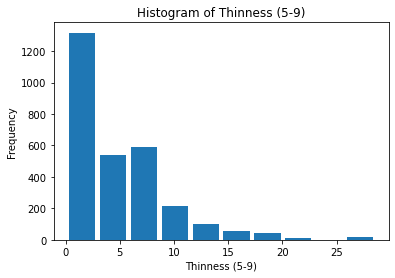

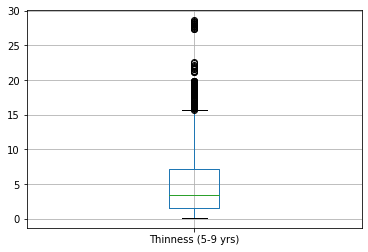

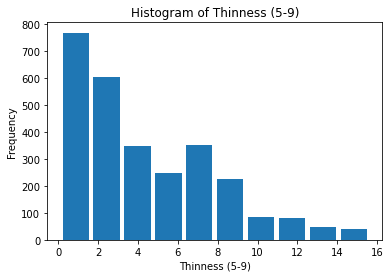

 
-1.521 x + 76.11


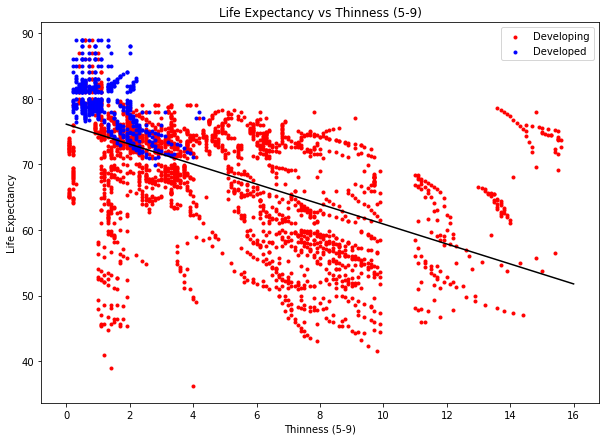

In [97]:
thinness = data[['Country', 'Year', 'Status', 'Life Expectancy', 'Thinness (5-9 yrs)','Population']]
thinness = thinness.dropna(subset=["Thinness (5-9 yrs)"]).copy()

plt.hist(x=thinness['Thinness (5-9 yrs)'], rwidth=0.85)
plt.xlabel('Thinness (5-9)')
plt.ylabel('Frequency')
plt.title('Histogram of Thinness (5-9)')
plt.show()

thinness.boxplot(column = ['Thinness (5-9 yrs)'])
plt.show()

Q1 = thinness['Thinness (5-9 yrs)'].quantile(q=0.25)
Q3 = thinness['Thinness (5-9 yrs)'].quantile(q=0.75)
mask1 = (thinness['Thinness (5-9 yrs)'] < Q3 + 1.5 * (Q3-Q1)) & (thinness['Thinness (5-9 yrs)'] > Q1 - 1.5 * (Q3-Q1))
thinness = thinness[mask1]

plt.hist(x=thinness['Thinness (5-9 yrs)'], rwidth=0.85)
plt.xlabel('Thinness (5-9)')
plt.ylabel('Frequency')
plt.title('Histogram of Thinness (5-9)')
plt.show()

x1 = thinness['Thinness (5-9 yrs)'][thinness['Status'] == 'Developing']
y1 = thinness['Life Expectancy'][thinness['Status'] == 'Developing']
x2 = thinness['Thinness (5-9 yrs)'][thinness['Status'] == 'Developed']
y2 = thinness['Life Expectancy'][thinness['Status'] == 'Developed']
plt.figure(figsize=(10,7))
plt.scatter(x1, y1, marker=".", color='red')
plt.scatter(x2, y2, marker='.', color='blue')
plt.legend(['Developing', 'Developed'])

model = np.poly1d(np.polyfit(thinness['Thinness (5-9 yrs)'], thinness['Life Expectancy'], 1))
polyline = np.linspace(0,16)
plt.plot(polyline, model(polyline), color = "black")
print(model)
plt.title('Life Expectancy vs Thinness (5-9)')
plt.xlabel('Thinness (5-9)')
plt.ylabel("Life Expectancy")
plt.savefig("thinness5-9.png")
plt.show()

# Alcohol


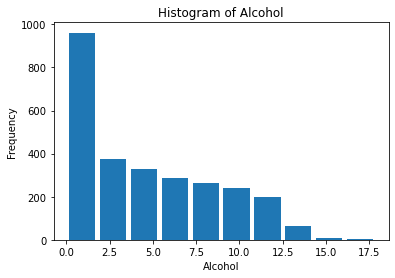

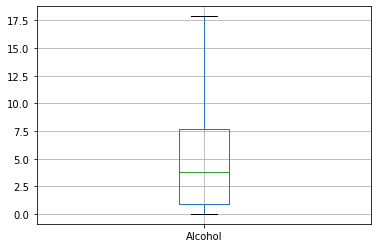

          3          2
-0.01613 x + 0.3373 x - 0.8173 x + 66.1


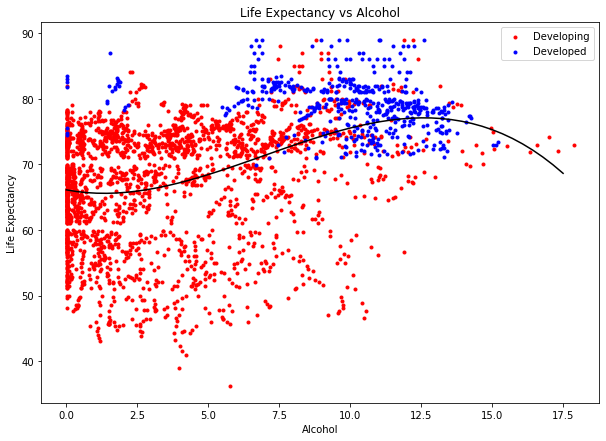

In [98]:
alcohol = data[['Country', 'Year', 'Status', 'Life Expectancy', 'Alcohol','Population']]
alcohol = alcohol.dropna(subset=["Alcohol"]).copy()

plt.hist(x=alcohol['Alcohol'], rwidth=0.85)
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.title('Histogram of Alcohol')
plt.show()

alcohol.boxplot(column = ['Alcohol'])
plt.show()

x1 = alcohol['Alcohol'][alcohol['Status'] == 'Developing']
y1 = alcohol['Life Expectancy'][alcohol['Status'] == 'Developing']
x2 = alcohol['Alcohol'][alcohol['Status'] == 'Developed']
y2 = alcohol['Life Expectancy'][alcohol['Status'] == 'Developed']
plt.figure(figsize=(10,7))
plt.scatter(x1, y1, marker=".", color='red')
plt.scatter(x2, y2, marker='.', color='blue')
plt.legend(['Developing', 'Developed'])

model = np.poly1d(np.polyfit(alcohol['Alcohol'], alcohol['Life Expectancy'], 3))
polyline = np.linspace(0,17.5)
plt.plot(polyline, model(polyline), color = "black")
print(model)
plt.title('Life Expectancy vs Alcohol')
plt.xlabel('Alcohol')
plt.ylabel("Life Expectancy")
plt.savefig("alcohol.png")
plt.show()

# Total Expenditure

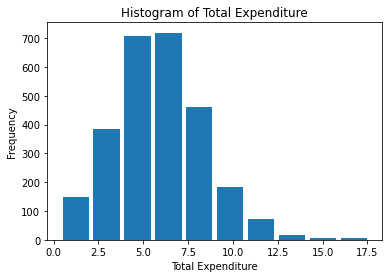

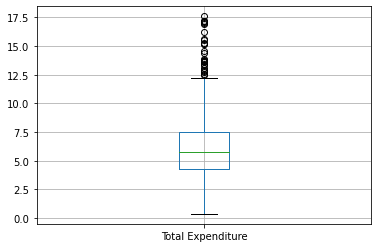

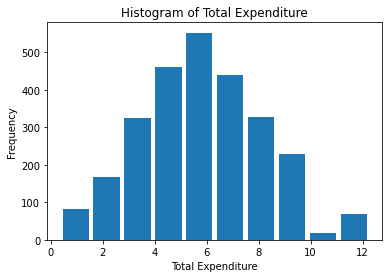

 
0.9213 x + 63.83


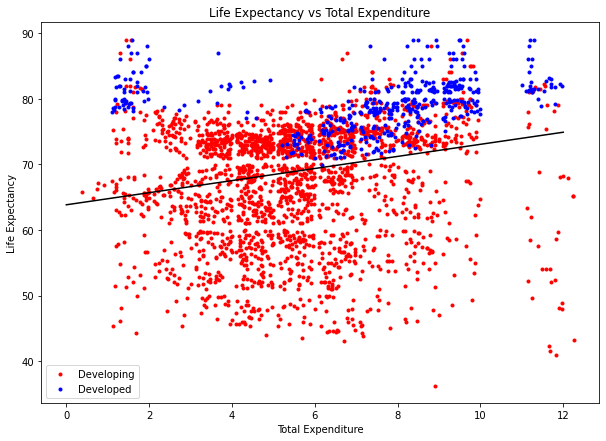

In [99]:
total_expend = data[['Country', 'Year', 'Status', 'Life Expectancy', 'Total Expenditure','Population']]
total_expend = total_expend.dropna(subset=["Total Expenditure"]).copy()

plt.hist(x=total_expend['Total Expenditure'], rwidth=0.85)
plt.xlabel('Total Expenditure')
plt.ylabel('Frequency')
plt.title('Histogram of Total Expenditure')
plt.show()

total_expend.boxplot(column = ['Total Expenditure'])
plt.show()

Q1 = total_expend['Total Expenditure'].quantile(q=0.25)
Q3 = total_expend['Total Expenditure'].quantile(q=0.75)
mask1 = (total_expend['Total Expenditure'] < Q3 + 1.5 * (Q3-Q1)) & (total_expend['Total Expenditure'] > Q1 - 1.5 * (Q3-Q1))
total_expend = total_expend[mask1]

plt.hist(x=total_expend['Total Expenditure'], rwidth=0.85)
plt.xlabel('Total Expenditure')
plt.ylabel('Frequency')
plt.title('Histogram of Total Expenditure')
plt.show()

x1 = total_expend['Total Expenditure'][total_expend['Status'] == 'Developing']
y1 = total_expend['Life Expectancy'][total_expend['Status'] == 'Developing']
x2 = total_expend['Total Expenditure'][total_expend['Status'] == 'Developed']
y2 = total_expend['Life Expectancy'][total_expend['Status'] == 'Developed']
plt.figure(figsize=(10,7))
plt.scatter(x1, y1, marker=".", color='red')
plt.scatter(x2, y2, marker='.', color='blue')
plt.legend(['Developing', 'Developed'])

model = np.poly1d(np.polyfit(total_expend['Total Expenditure'], total_expend['Life Expectancy'], 1))
polyline = np.linspace(0,12)
plt.plot(polyline, model(polyline), color = "black")
print(model)
plt.title('Life Expectancy vs Total Expenditure')
plt.xlabel('Total Expenditure')
plt.ylabel("Life Expectancy")
plt.savefig("total_expend.png")
plt.show()

# Percent Expenditure

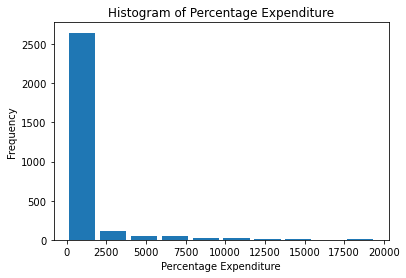

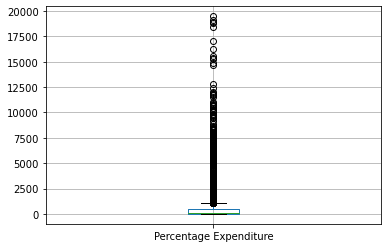

 
0.001827 x + 67.87


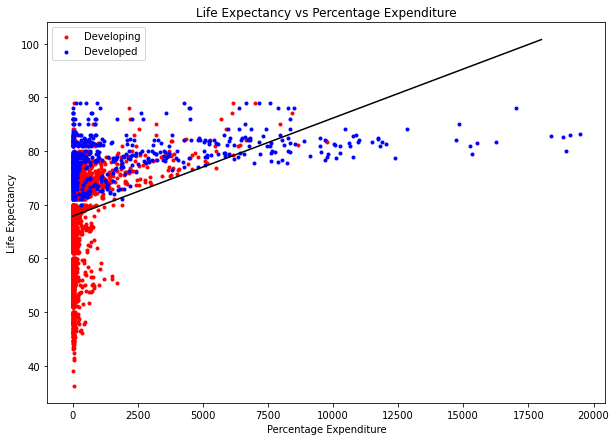

In [100]:
percent_expend = data[['Country', 'Year', 'Status', 'Life Expectancy', 'Percentage Expenditure','Population']]
percent_expend = percent_expend.dropna(subset=["Percentage Expenditure"]).copy()

plt.hist(x=percent_expend['Percentage Expenditure'], rwidth=0.85)
plt.xlabel('Percentage Expenditure')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Expenditure')
plt.show()

percent_expend.boxplot(column = ['Percentage Expenditure'])
plt.show()

x1 = percent_expend['Percentage Expenditure'][percent_expend['Status'] == 'Developing']
y1 = percent_expend['Life Expectancy'][percent_expend['Status'] == 'Developing']
x2 = percent_expend['Percentage Expenditure'][percent_expend['Status'] == 'Developed']
y2 = percent_expend['Life Expectancy'][percent_expend['Status'] == 'Developed']
plt.figure(figsize=(10,7))
plt.scatter(x1, y1, marker=".", color='red')
plt.scatter(x2, y2, marker='.', color='blue')
plt.legend(['Developing', 'Developed'])

model = np.poly1d(np.polyfit(percent_expend['Percentage Expenditure'], percent_expend['Life Expectancy'], 1))
polyline = np.linspace(0,18000)
plt.plot(polyline, model(polyline), color = "black")
print(model)
plt.title('Life Expectancy vs Percentage Expenditure')
plt.xlabel('Percentage Expenditure')
plt.ylabel("Life Expectancy")
plt.savefig("percent_expend.png")
plt.show()

# GDP

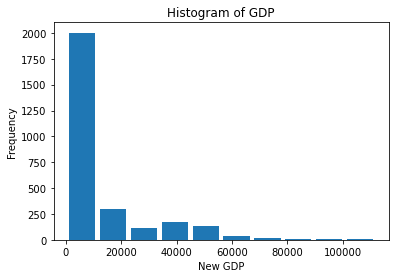

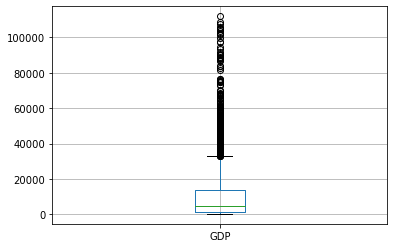

            4             3             2
-1.965e-18 x + 5.594e-13 x - 5.247e-08 x + 0.00181 x + 60.58


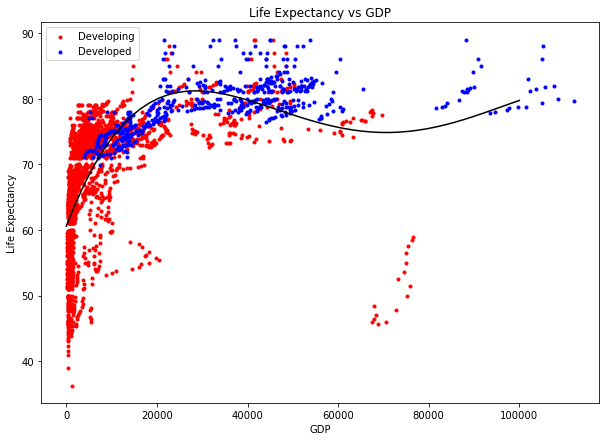

In [101]:
gdp = data[['Country', 'Year', 'Status', 'Life Expectancy', 'GDP','Population']]
gdp = gdp.dropna(subset=["GDP"]).copy()

plt.hist(x=gdp['GDP'], rwidth=0.85)
plt.xlabel('New GDP')
plt.ylabel('Frequency')
plt.title('Histogram of GDP')
plt.show()

gdp.boxplot(column = ['GDP'])
plt.show()

x1 = gdp['GDP'][gdp['Status'] == 'Developing']
y1 = gdp['Life Expectancy'][gdp['Status'] == 'Developing']
x2 = gdp['GDP'][gdp['Status'] == 'Developed']
y2 = gdp['Life Expectancy'][gdp['Status'] == 'Developed']
plt.figure(figsize=(10,7))
plt.scatter(x1, y1, marker=".", color='red')
plt.scatter(x2, y2, marker='.', color='blue')
plt.legend(['Developing', 'Developed'])

model = np.poly1d(np.polyfit(gdp['GDP'], gdp['Life Expectancy'], 4))
polyline = np.linspace(0,100000)
plt.plot(polyline, model(polyline), color = "black")
print(model)
plt.title('Life Expectancy vs GDP')
plt.xlabel('GDP')
plt.ylabel("Life Expectancy")
plt.savefig("gdp.png")
plt.show()

# BMI

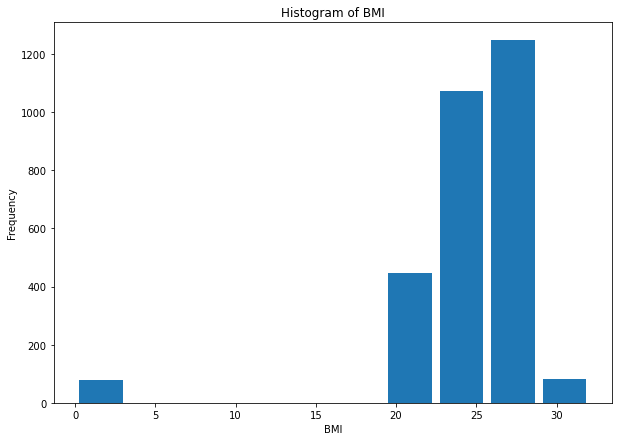

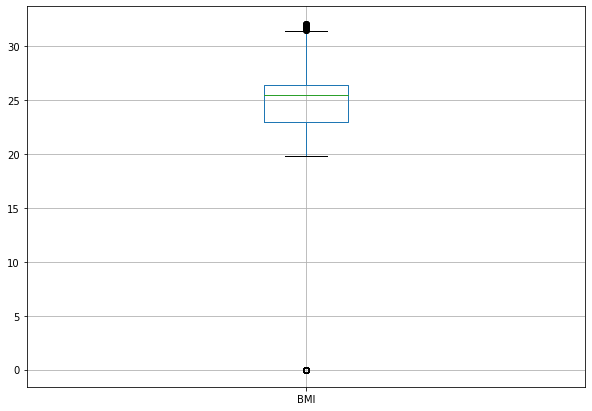

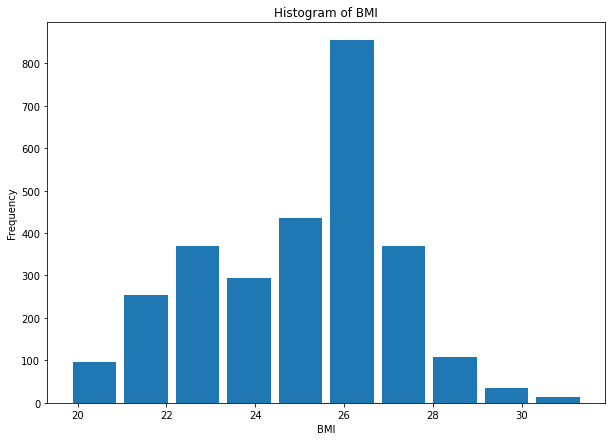

 
2.699 x + 2.105


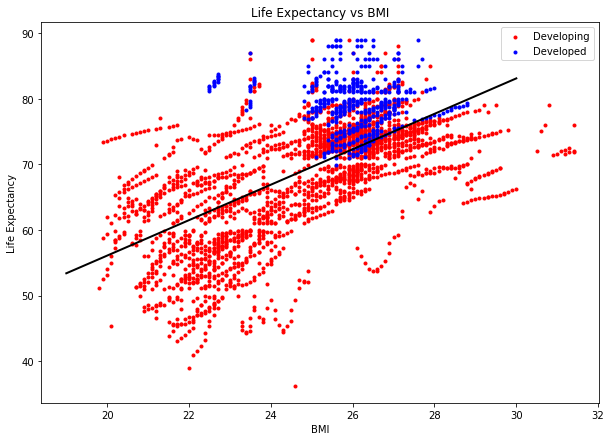

In [102]:
bmi = data[['Country', 'Year', 'Status', 'Life Expectancy', 'BMI','Population']]
bmi = bmi.dropna(subset=["BMI"]).copy()

plt.figure(figsize=(10,7))
plt.hist(x=bmi['BMI'], rwidth=0.85)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram of BMI')
plt.savefig("bmi_hist_before.png")
plt.show()

plt.figure(figsize=(10,7))
bmi.boxplot(column = ['BMI'])
plt.savefig("bmi_box.png")
plt.show()

Q1 = bmi['BMI'].quantile(q=0.25)
Q3 = bmi['BMI'].quantile(q=0.75)
mask1 = (bmi['BMI'] < Q3 + 1.5 * (Q3-Q1)) & (bmi['BMI'] > Q1 - 1.5 * (Q3-Q1))
bmi = bmi[mask1]

plt.figure(figsize=(10,7))
plt.hist(x=bmi['BMI'], rwidth=0.85)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram of BMI')
plt.savefig("bmi_hist_after.png")
plt.show()

x1 = bmi['BMI'][bmi['Status'] == 'Developing']
y1 = bmi['Life Expectancy'][bmi['Status'] == 'Developing']
x2 = bmi['BMI'][bmi['Status'] == 'Developed']
y2 = bmi['Life Expectancy'][bmi['Status'] == 'Developed']
plt.figure(figsize=(10,7))
plt.scatter(x1, y1, marker=".", color='red')
plt.scatter(x2, y2, marker='.', color='blue')
plt.legend(['Developing', 'Developed'])

model = np.poly1d(np.polyfit(bmi['BMI'], bmi['Life Expectancy'], 1))
polyline = np.linspace(19,30)
plt.plot(polyline, model(polyline), color="black", linewidth=2)
print(model)
plt.title('Life Expectancy vs BMI')
plt.xlabel('BMI')
plt.ylabel("Life Expectancy")
plt.savefig("bmi.png")
plt.show()

# Immunization

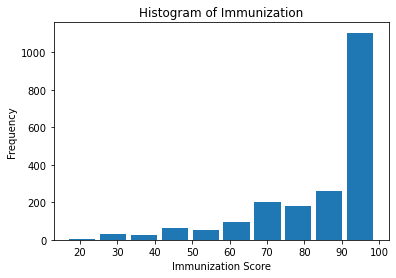

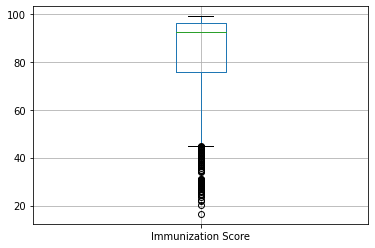

 
0.2173 x + 51.85


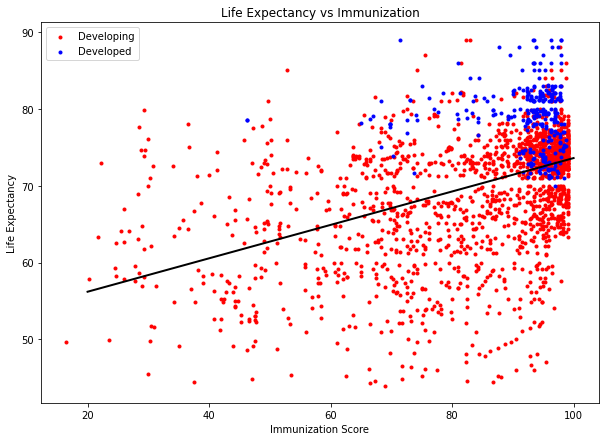

In [103]:
immunization = data[['Country', 'Year', 'Status', 'Life Expectancy', 'Immunization Score','Population']]
immunization = immunization.dropna(subset=['Immunization Score']).copy()

plt.hist(x=immunization['Immunization Score'], rwidth=0.85)
plt.xlabel('Immunization Score')
plt.ylabel('Frequency')
plt.title('Histogram of Immunization')
plt.show()

immunization.boxplot(column = ['Immunization Score'])
plt.show()

x1 = immunization['Immunization Score'][immunization['Status'] == 'Developing']
y1 = immunization['Life Expectancy'][immunization['Status'] == 'Developing']
x2 = immunization['Immunization Score'][immunization['Status'] == 'Developed']
y2 = immunization['Life Expectancy'][immunization['Status'] == 'Developed']
plt.figure(figsize=(10,7))
plt.scatter(x1, y1, marker=".", color='red')
plt.scatter(x2, y2, marker='.', color='blue')
plt.legend(['Developing', 'Developed'])

model = np.poly1d(np.polyfit(immunization['Immunization Score'], immunization['Life Expectancy'], 1))
polyline = np.linspace(20,100)
plt.plot(polyline, model(polyline), color="black", linewidth=2)
print(model)
plt.title('Life Expectancy vs Immunization')
plt.xlabel('Immunization Score')
plt.ylabel("Life Expectancy")
plt.savefig("immunization.png")
plt.show()

# Correlation Matrix

In [109]:
corr_data = data[[
    'Status', 
    'Life Expectancy', 
    'Alcohol', 
    'Percentage Expenditure',
    'Hepatitis B', 
    'Under-Five Deaths',
    'Polio',
    'Total Expenditure',
    'Diphtheria',
    'HIV/AIDS',
    'Thinness (1-19 yrs)',
    'Thinness (5-9 yrs)',
    'Income Composition of Resources',
    'Schooling',
    'BMI',
    'GDP',
    'Measles',
    'Population'
]].copy()

mask1 = corr_data["Status"] == "Developing"
mask2 = corr_data["Status"] == "Developed"
corr_data.loc[mask1,"Status"] = 0
corr_data.loc[mask2, "Status"] = 1

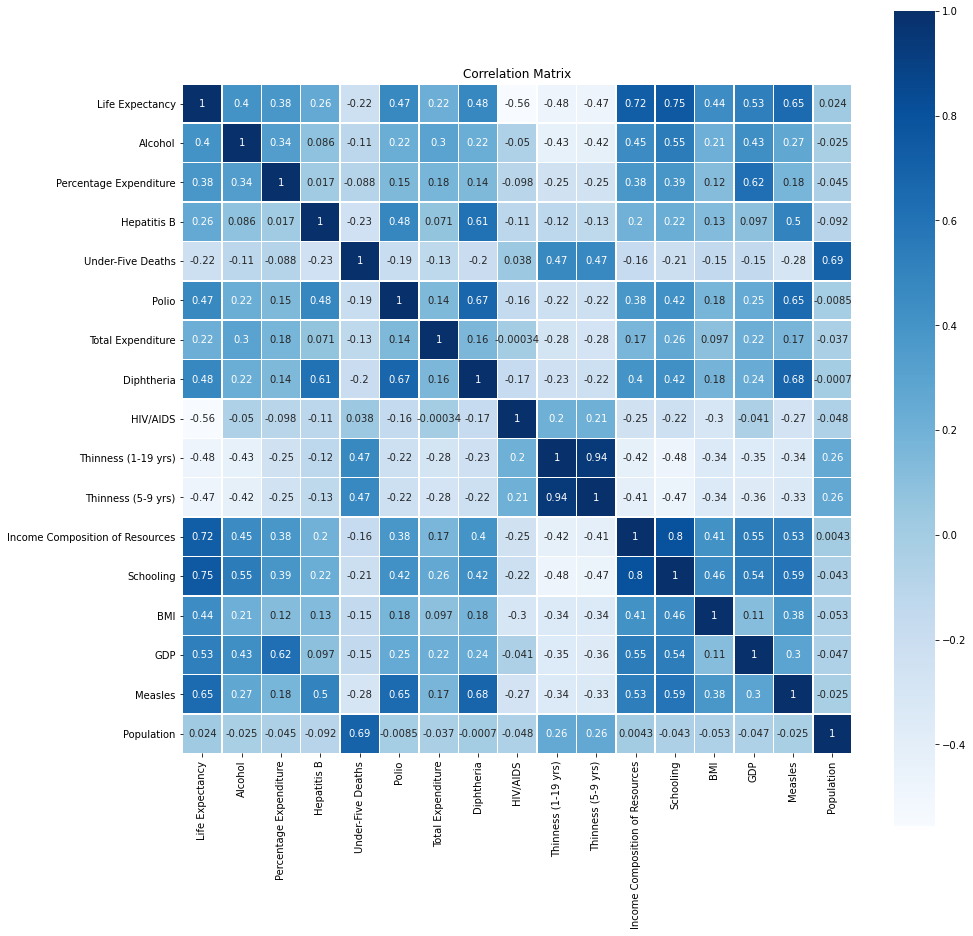

In [110]:
corr = corr_data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, square=True, annot=True, linewidth=0.5, cmap='Blues')
plt.title("Correlation Matrix")
plt.savefig("correlation_matrix.png")
plt.show()